In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from numpy import linalg as LA

In [5]:
df=pd.read_csv("train.csv")


In [6]:
df=df[df.label.isin([1,2])]
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:

zero_columns=df.columns[(df.sum()==0)]
df.drop(columns=zero_columns,inplace=True) # drop the zero columns

#Separate the label and data
df_label=df.label
df_data=df.drop(columns=["label"])
df.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel717,pixel718,pixel719,pixel720,pixel721,pixel722,pixel723,pixel724,pixel725,pixel726
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_data = (df_data - df_data.mean()) / df_data.std()
ei_w,ei_v=LA.eig(df_data.corr())
Rj=np.cumsum(ei_w)/len(df.columns)
Rj

array([0.1082641 +0.00000000e+00j, 0.15563667+0.00000000e+00j,
       0.20009366+0.00000000e+00j, 0.23011623+0.00000000e+00j,
       0.25559992+0.00000000e+00j, 0.27738208+0.00000000e+00j,
       0.2962663 +0.00000000e+00j, 0.31479028+0.00000000e+00j,
       0.33261784+0.00000000e+00j, 0.34766316+0.00000000e+00j,
       0.36232879+0.00000000e+00j, 0.37522082+0.00000000e+00j,
       0.38760067+0.00000000e+00j, 0.39893014+0.00000000e+00j,
       0.4098207 +0.00000000e+00j, 0.42056572+0.00000000e+00j,
       0.43103291+0.00000000e+00j, 0.44097958+0.00000000e+00j,
       0.45068002+0.00000000e+00j, 0.4597615 +0.00000000e+00j,
       0.46855678+0.00000000e+00j, 0.47712185+0.00000000e+00j,
       0.48531865+0.00000000e+00j, 0.49347061+0.00000000e+00j,
       0.50140446+0.00000000e+00j, 0.50911024+0.00000000e+00j,
       0.51643056+0.00000000e+00j, 0.52354545+0.00000000e+00j,
       0.53057959+0.00000000e+00j, 0.53732074+0.00000000e+00j,
       0.54397469+0.00000000e+00j, 0.55048644+0.0000000

In [33]:
np.linalg.eig(df_data.corr())

(array([ 6.72320032e+01+0.00000000e+00j,  2.94183716e+01+0.00000000e+00j,
         2.76077885e+01+0.00000000e+00j,  1.86440155e+01+0.00000000e+00j,
         1.58253718e+01+0.00000000e+00j,  1.35267192e+01+0.00000000e+00j,
         1.17271039e+01+0.00000000e+00j,  1.15033919e+01+0.00000000e+00j,
         1.10709135e+01+0.00000000e+00j,  9.34314043e+00+0.00000000e+00j,
         9.10735733e+00+0.00000000e+00j,  8.00595250e+00+0.00000000e+00j,
         7.68788635e+00+0.00000000e+00j,  7.03559845e+00+0.00000000e+00j,
         6.76303881e+00+0.00000000e+00j,  6.67265886e+00+0.00000000e+00j,
         6.50012555e+00+0.00000000e+00j,  6.17688462e+00+0.00000000e+00j,
         6.02397014e+00+0.00000000e+00j,  5.63959822e+00+0.00000000e+00j,
         5.46186963e+00+0.00000000e+00j,  5.31891110e+00+0.00000000e+00j,
         5.09021086e+00+0.00000000e+00j,  5.06236726e+00+0.00000000e+00j,
         4.92692308e+00+0.00000000e+00j,  4.78528807e+00+0.00000000e+00j,
         4.54592009e+00+0.00000000e+00

C:\Users\Duong Hung\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


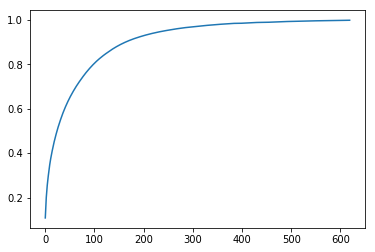

In [9]:
plt.plot(Rj)
plt.show()
cover=0.5 # the chosen percentage of variance of the dataset
a=np.where(Rj==Rj[(Rj-cover)>0][0])[0][0] # Number of principal components

In [10]:
#project the dataset to Ra
vm=ei_v[:,:a]
data_pca=np.dot(df_data,vm)
data_pca=pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,(-3.212583078314217+0j),(-9.112017280474815+0j),(-4.787972773763606+0j),(0.03222465368837377+0j),(-1.4345051364831904+0j),(3.4640796759152344+0j),(-5.17775889007606+0j),(4.982615871855713+0j),(-0.8802724488398335+0j),(0.2698918919030261+0j),...,(-0.02420544299446467+0j),(0.5248260764006042+0j),(0.6194025401920967+0j),(-1.299664192646765+0j),(-0.9085080213502733+0j),(-0.8268637755331109+0j),(-1.2307931464237496+0j),(-0.5665847747901048+0j),(0.07777154046463568+0j),(0.5917451686532118+0j)
1,(-8.55972729464777+0j),(3.3645241348352126+0j),(5.387225217117519+0j),(-1.4976543864139211+0j),(1.3745287858231692+0j),(0.8218398401095143+0j),(-0.07600980484226474+0j),(-0.9918222193169219+0j),(0.6763785395307371+0j),(-0.3161275399709006+0j),...,(-0.9570644067261146+0j),(-0.17757927417881023+0j),(-0.22210481742782523+0j),(-0.36447050505848755+0j),(-1.0501518494521238+0j),(-0.8942860175223536+0j),(-0.47678629860207855+0j),(0.5975478797717496+0j),(0.3692453798897841+0j),(0.8622706567556493+0j)
2,(-8.652134388002793+0j),(0.8145037456391028+0j),(3.705318144979573+0j),(0.6237182212882617+0j),(0.5401129493487715+0j),(-0.9444921299247792+0j),(0.39437951109720104+0j),(-0.951219382376887+0j),(1.903091442515319+0j),(-1.432964675643177+0j),...,(0.6793032618704604+0j),(-1.4175226527925249+0j),(0.07835366303513736+0j),(-1.717633894294841+0j),(0.018798759505012017+0j),(-1.177361964223112+0j),(-1.104123253881516+0j),(1.0851808834462127+0j),(0.045547045275327686+0j),(-0.46901972848934387+0j)
3,(-8.008902645874466+0j),(-1.5532078701637917+0j),(0.9585359879579199+0j),(0.9230783025326332+0j),(0.3758531660277361+0j),(-2.828938474040201+0j),(-0.6645477358113512+0j),(-2.2820760903453814+0j),(-1.3797233754691158+0j),(-1.7125294913314777+0j),...,(0.23723346102784723+0j),(-1.8340374031383684+0j),(-0.13473793349287044+0j),(0.8332001708714951+0j),(1.2874409513518112+0j),(0.9652776471659896+0j),(0.3270523098354286+0j),(0.8888780184191668+0j),(0.41782082256825304+0j),(-0.5913381840213977+0j)
4,(1.8105063949071667+0j),(9.948552424631998+0j),(-8.779923343173333+0j),(-7.0632262858164525+0j),(-8.637962814279254+0j),(-0.19295515565051258+0j),(7.571532034763336+0j),(6.985698959738426+0j),(4.161720523451841+0j),(2.7557088598817105+0j),...,(1.7668623626484996+0j),(-1.120097469897218+0j),(-0.47156249120127913+0j),(0.9156779676569715+0j),(1.99668791097681+0j),(-2.1707741904112083+0j),(0.6534631798334195+0j),(2.641348801362934+0j),(-0.679765608234044+0j),(-3.132086529256122+0j)


In [11]:
# split the data set
X=data_pca
y=df_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=42,stratify=y)

In [12]:
for i in range(1,4):
    print(len(y_train[y_train==i]))
for i in range(1,4):
    print(len(y_test[y_test==i]))

3747
3341
0
937
836
0


In [13]:
step1=[1,2]
y_train_13=y_train[y_train.isin(step1)]
y_train_13[y_train_13==2]=-1
y_test_13=y_test[y_test.isin(step1)]
y_test_13[y_test_13==2]=-1

X_train_13=X_train.loc[list(y_train.isin(step1))]
X_test_13=X_test.loc[list(y_test.isin(step1))]

In [ ]:
y_train_13


In [26]:
y_test_13.reset_index(drop=True,inplace=True)
y_train_13.reset_index(drop=True,inplace=True)

In [27]:
svclassifier13 = SVC(kernel='rbf',C=1,gamma=1)
X_train_13=X_train_13.astype("float")
X_test_13=X_test_13.astype("float")
svclassifier13.fit(X_train_13, y_train_13)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [28]:
y_pred_13 = svclassifier13.predict(X_test_13)

In [29]:
y_pred_13 = svclassifier13.predict(X_train_13)
print(confusion_matrix(y_train_13, y_pred_13))
print(classification_report(y_train_13, y_pred_13))

[[3341    0]
 [   0 3747]]
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      3341
           1       1.00      1.00      1.00      3747

    accuracy                           1.00      7088
   macro avg       1.00      1.00      1.00      7088
weighted avg       1.00      1.00      1.00      7088



In [18]:

print(confusion_matrix(y_test_13, y_pred_13))
print(classification_report(y_test_13, y_pred_13))

ValueError: Found input variables with inconsistent numbers of samples: [1773, 7088]

In [ ]:
X_train.loc[list(y_train.isin(step1))]

In [ ]:
whos


In [ ]:
data_pca.columns


In [ ]:
train_test_split?